# FDM Oblig
###### Rapport av Nils Erlend Heggem
###### I samarbeid med Marte Kristoffersen, Tone Marie Løvseth Hognestad og Jon Skjelsbæk

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

def firstGraph(xList, yList, liftX, liftY, leftFix, rightFix, totalLen):
    for i, x in enumerate(xList):
        if (x <= liftX):
            yList[i] = ((liftY - leftFix) / liftX) * x + leftFix
        else:
            yList[i] = ((rightFix - liftY) / (totalLen - liftX)) * x + (rightFix - (((rightFix - liftY) / (totalLen - liftX))) * totalLen)
      

def fixEnds(u, leftFix, rightFix):
    for i, y in enumerate(u):
        y[0] = leftFix
        y[-1] = rightFix

def FDMsolver(x, timeAmounts, hx, ht, c, liftX, liftY, leftFix, rightFix, totalLen):
    u = timeAmounts * [np.zeros(len(x))]
    
    #firstGraph(x, u[0], liftX, liftY, leftFix, rightFix, totalLen)
    u[1] = u[0].copy() +hx*2
    
    fixEnds(u, leftFix, rightFix)
    
    for i in range(2, len(u)):
        for j in range(1, len(u[i]) - 1):
            u[i][j] = (c**2 * ht**2 * (u[i-1][j+1] - 2*u[i-1][j] + u[i-1][j-1])) / (hx**2) + 2*u[i-1][j] - u[i-2][j]
        u[i] = u[i] * 1
                       
    return u



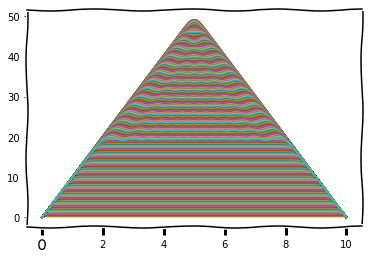

In [62]:
plt.xkcd()
x, h = np.linspace(0, 10, 100, retstep=True)

u = FDMsolver(x, 400, h, h*0.2, 1, 0, 0, 0, 0, np.pi)

for i, y in enumerate(u):
    plt.plot(x,y)
plt.show()

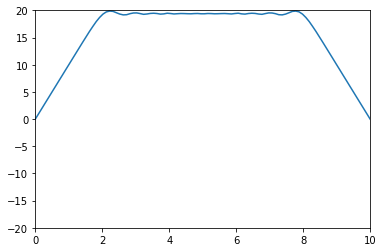

In [61]:
fig, ax = plt.subplots()
ax.axis([0,10,-20,20])
l, = ax.plot([],[])

def animate(i):
    l.set_data(x, u[i])

ani = animation.FuncAnimation(fig, animate, frames=len(u), interval=10)

HTML(ani.to_jshtml())
